# Imports

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from itertools import combinations 
import scipy.stats as stats
import scipy
from scipy.stats import ttest_ind
from scipy.stats import fisher_exact

# autoreload
%load_ext autoreload
%autoreload 2

#This filters out future warnings
import warnings  
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import roc_auc_score

# Hypothesis test. ( A reminder )

Null Hypothesis (H0): There is no significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

Alternative Hypothesis (Ha): There is a significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

# Import the DataFrame

In [51]:
cardio = pd.read_csv('../data/Cardiovascular_cleaned.csv')
cardio.shape

(308854, 19)

In [52]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [53]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Changing the DataFrame. Details below. 

## Changes Sex column to binary with Male=1 and Female=0

In [54]:
# Convert 'Female' and 'Male' in the 'Sex' column to 0 and 1, respectively
cardio['Sex'] = cardio['Sex'].replace({'Female': 0, 'Male': 1})

# Create new binary columns for 'Male' and 'Female'
cardio['Male'] = (cardio['Sex'] == 1).astype(int)
cardio['Female'] = (cardio['Sex'] == 0).astype(int)

# Drop the original 'Sex' column
cardio.drop(columns=['Sex'], inplace=True)

# Verify the counts in 'Male' and 'Female' columns
print(cardio['Male'].value_counts())
print(cardio['Female'].value_counts())

0    160196
1    148658
Name: Male, dtype: int64
1    160196
0    148658
Name: Female, dtype: int64


In [41]:
cardio.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Height_(cm),Weight_(kg),BMI,Smoking_History,...,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Average_Age,Male,Female
0,0,0,0,0,0,1,150.0,32.66,14.54,1,...,0,1,0,0,0,0,0,72.0,0,1
1,0,1,0,0,0,0,165.0,77.11,28.29,0,...,0,0,0,1,0,1,0,72.0,0,1
2,1,0,0,0,0,0,163.0,88.45,33.47,0,...,0,0,0,1,0,1,0,62.0,0,1
3,1,1,0,0,0,0,180.0,93.44,28.73,0,...,0,0,0,1,0,1,0,77.0,1,0
4,0,0,0,0,0,0,191.0,88.45,24.37,1,...,0,0,0,1,0,0,0,85.0,1,0


## Takes columns with (yes / no ) and changes them to 1=Yes and 0=No

In [55]:
# Map binary categorical variables to 0 and 1
binary_cols = ['Heart_Disease', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']
cardio[binary_cols] = cardio[binary_cols].replace({'No': 0, 'Yes': 1})

# Confirm the encoding
print(cardio[binary_cols].head())

   Heart_Disease  Exercise  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0              0         0            0             0           0          1   
1              1         0            0             0           0          0   
2              0         1            0             0           0          0   
3              1         1            0             0           0          0   
4              0         0            0             0           0          0   

   Smoking_History  
0                1  
1                0  
2                0  
3                0  
4                1  


### head() to see results

In [56]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Male,Female
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0,1
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,0,1
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0,1
3,Poor,Within the past year,1,1,0,0,0,Yes,0,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,1,0
4,Good,Within the past year,0,0,0,0,0,No,0,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,1,0


### Changes columns General Health , Diabetes, and Checkup from object to binary columns with get-dummies

In [58]:
# Apply one-hot encoding to 'General_Health', 'Checkup', and 'Diabetes' columns
cardio = pd.get_dummies(cardio, columns=['General_Health', 'Checkup', 'Diabetes'], drop_first=True)

# Verify the DataFrame after preprocessing
print(cardio.head())

   Exercise  Heart_Disease  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0         0              0            0             0           0          1   
1         0              1            0             0           0          0   
2         1              0            0             0           0          0   
3         1              1            0             0           0          0   
4         0              0            0             0           0          0   

  Age_Category  Height_(cm)  Weight_(kg)    BMI  ...  General_Health_Good  \
0        70-74        150.0        32.66  14.54  ...                    0   
1        70-74        165.0        77.11  28.29  ...                    0   
2        60-64        163.0        88.45  33.47  ...                    0   
3        75-79        180.0        93.44  28.73  ...                    0   
4          80+        191.0        88.45  24.37  ...                    1   

   General_Health_Poor  General_Health_Very Good  Checku

### Changed Age_Category to Average_Age

In [59]:
Average_Age = []
for number in cardio['Age_Category']:
    if '-' in number:
        new = number.split('-')
        Average_Age.append((int(new[0]) + int(new[1])) / 2)
    else: 
        Average_Age.append(85)

cardio['Average_Age'] = Average_Age

cardio = cardio.drop(columns = 'Age_Category')

'''
Due to the last age group being 80+ with no upper limit I guessed and 
put the highest age at 85. This my impact things at the highest age range
'''

'\nDue to the last age group being 80+ with no upper limit I guessed and \nput the highest age at 85. This my impact things at the highest age range\n'

### One Last Look at the Changes

In [60]:
cardio.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Height_(cm),Weight_(kg),BMI,Smoking_History,...,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Average_Age
0,0,0,0,0,0,1,150.0,32.66,14.54,1,...,1,0,0,1,0,0,0,0,0,72.0
1,0,1,0,0,0,0,165.0,77.11,28.29,0,...,0,1,0,0,0,1,0,1,0,72.0
2,1,0,0,0,0,0,163.0,88.45,33.47,0,...,0,1,0,0,0,1,0,1,0,62.0
3,1,1,0,0,0,0,180.0,93.44,28.73,0,...,1,0,0,0,0,1,0,1,0,77.0
4,0,0,0,0,0,0,191.0,88.45,24.37,1,...,0,0,0,0,0,1,0,0,0,85.0


# Everything is now a number. Onward to the Logistic Regression! Huzzah!

## ...but first a few graphs

array([[<Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Heart_Disease'}>,
        <Axes: title={'center': 'Skin_Cancer'}>,
        <Axes: title={'center': 'Other_Cancer'}>,
        <Axes: title={'center': 'Depression'}>],
       [<Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking_History'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>,
        <Axes: title={'center': 'Male'}>],
       [<Axes: title={'center': 'Female'}>,
        <Axes: title={'center': 'General_Health_Fair'}>,
        <Axes: title={'center': 'General_Health_Good'}>,
        <Axes: title={'center': 'General_Health_Poor'}>,
        <Axes: tit

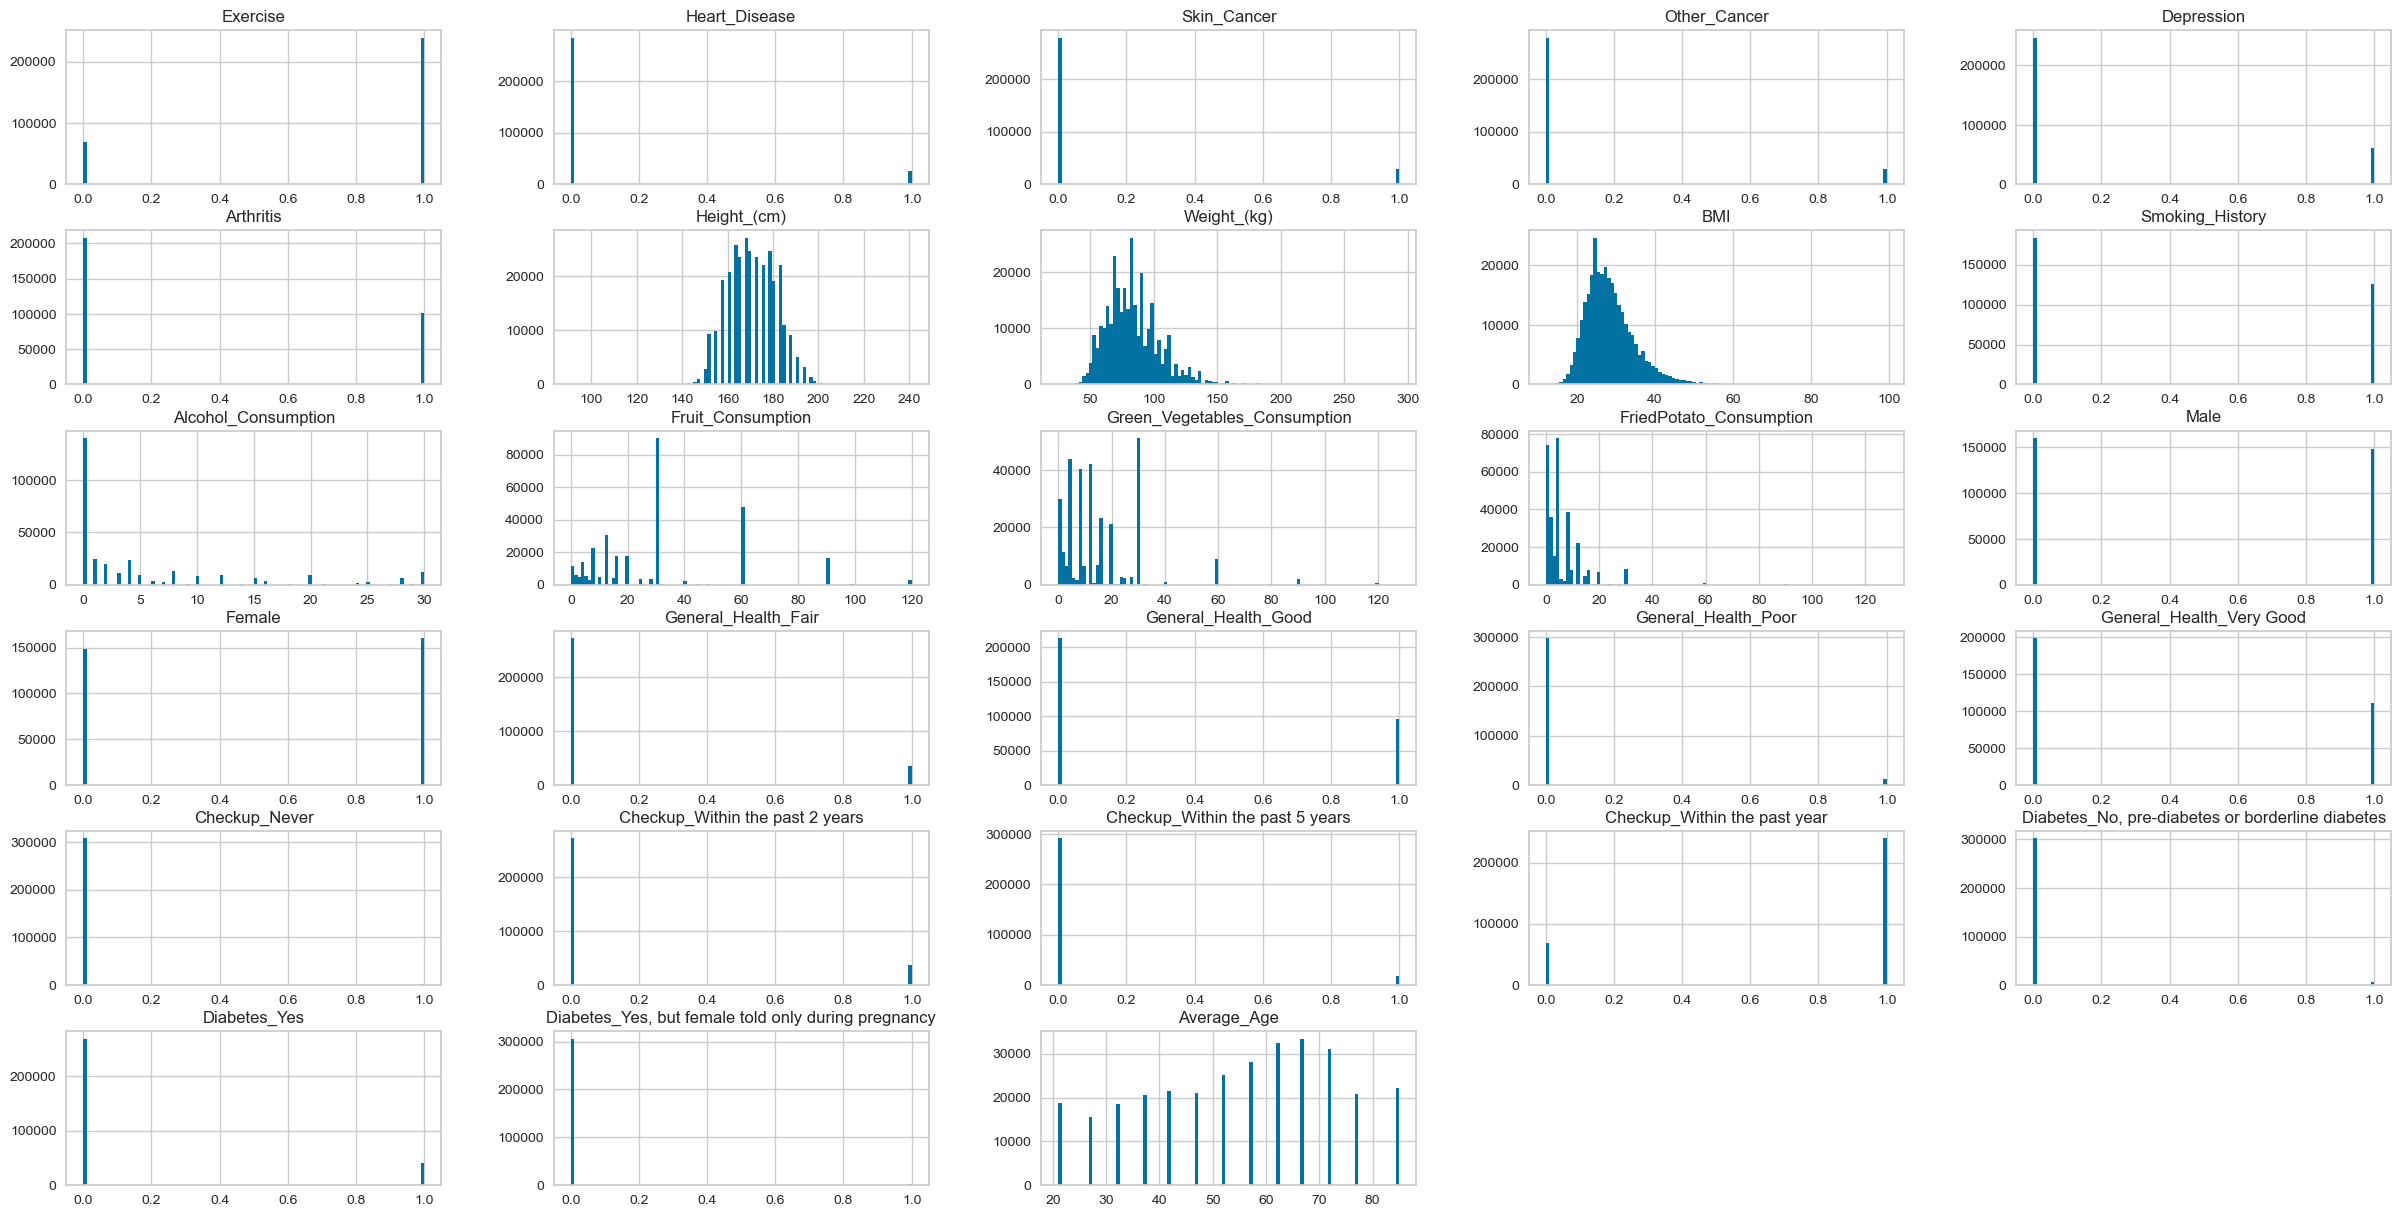

In [61]:
cardio.hist(bins=100, figsize = [30, 15])

## Correlation Heatmap beacuse who doesn't like a good heatmap

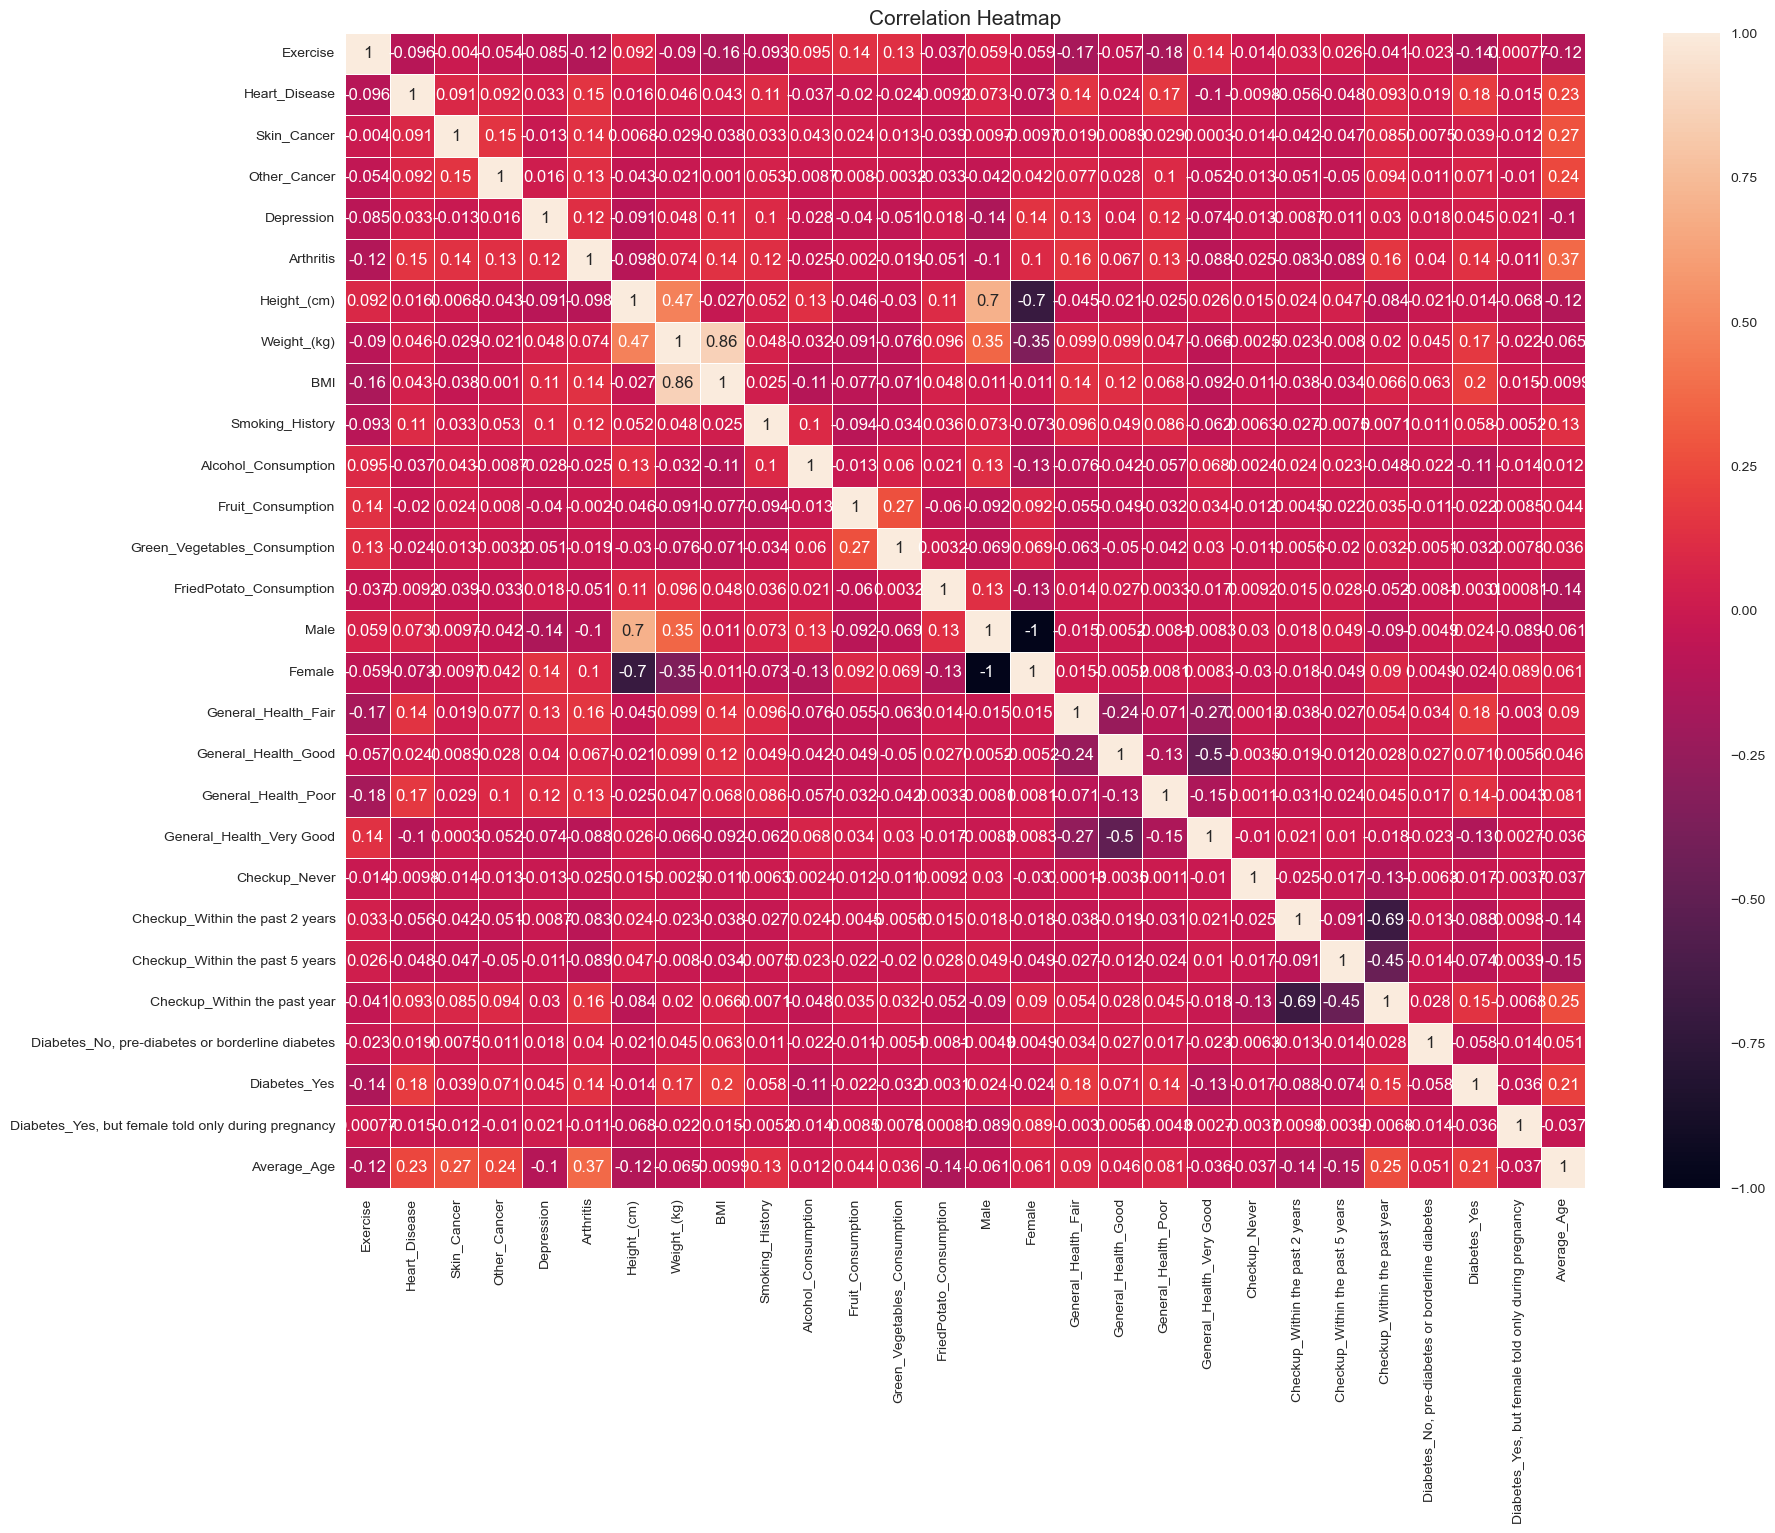

In [62]:
plt.figure(figsize = (20, 15))
sns.heatmap((cardio).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

# Onward to the Regression! Let's do this Logistically

* Note: This result is with the original Sex catagory with both Male and Female combined with NO Scaling

ROC-AUC scores for each fold:
[0.83040788 0.8321517  0.8251696  0.8301472  0.8207374 ]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.83

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.50      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771



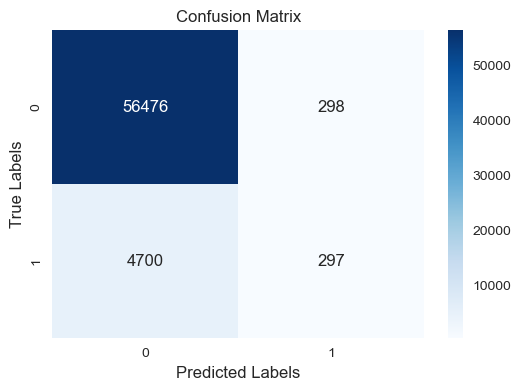

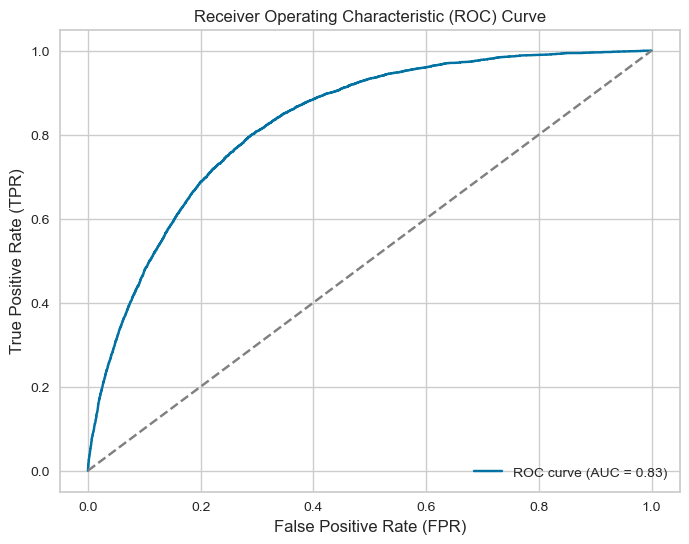

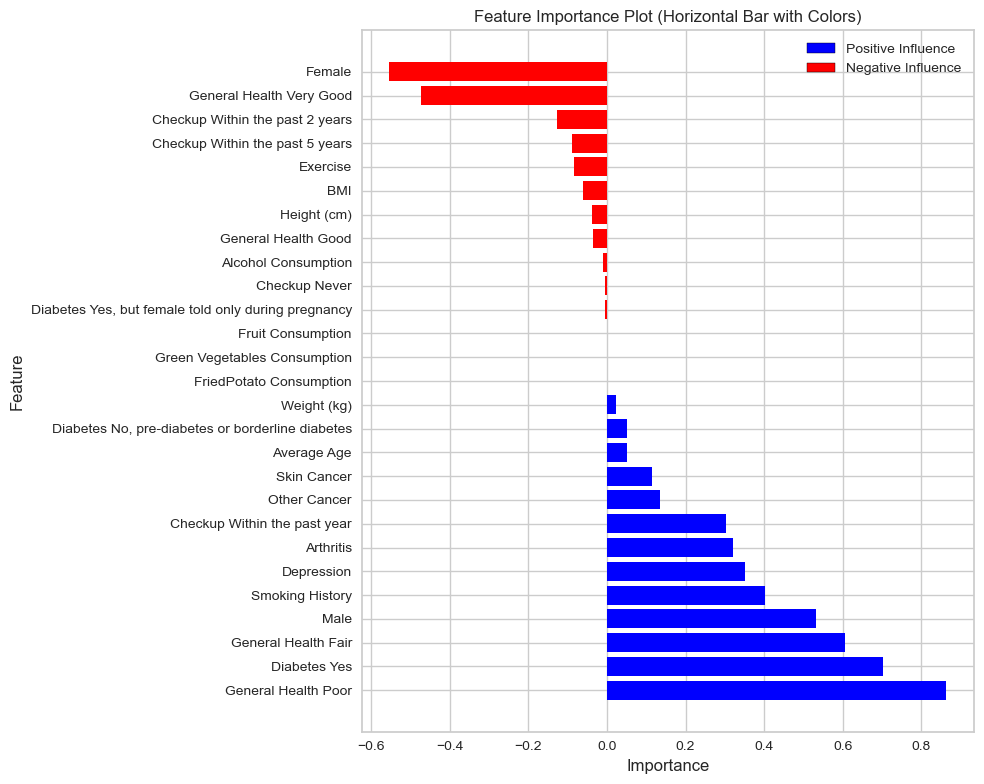

In [63]:
# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Perform k-fold cross-validation (let's say k=5)
k_folds = 5
scores = cross_val_score(logit_model, X_train, y_train, cv=k_folds, scoring='roc_auc')

# Print the performance metrics for each fold
print("ROC-AUC scores for each fold:")
print(scores)

# Calculate and print the average and standard deviation of the ROC-AUC scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"\nAverage ROC-AUC: {mean_score:.2f} (±{std_score:.2f})")

# Make predictions on the testing data using the trained model
y_pred = logit_model.predict(X_test)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance on the testing data using multiple metrics
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC on Testing Data: {test_roc_auc:.2f}")

# Get the classification report with multiple scores (precision, recall, F1-score, support)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred))

# Create a heatmap of the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ====================================================================
# Create a horizontal bar chart of feature importances with different colors

# Get feature names from cardio dataset
feature_names = X.columns

# Get feature importances from the fitted logistic regression model
feature_importances = logit_model.coef_[0]

# Sort features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Remove underscores from feature names
sorted_feature_names = [name.replace('_', ' ') for name in sorted_feature_names]

# Create a list of colors for the bars
colors = ['blue' if imp > 0 else 'red' for imp in sorted_importances]

plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center', color=colors)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Horizontal Bar with Colors)')
plt.tight_layout()

# Create custom legend handles with distinct colors
legend_handles = [Patch(facecolor='blue', edgecolor='black', label='Positive Influence'),
                  Patch(facecolor='red', edgecolor='black', label='Negative Influence')]

# Add the custom legend handles
plt.legend(handles=legend_handles)

plt.show()

## Weighted the Regression. The Confusion results are different, ROC is the same.

ROC-AUC scores for each fold:
[0.83565261 0.84008067 0.84220097 0.83715874 0.83096489 0.83410541
 0.83718771 0.83631537 0.82806219 0.82694394]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.83

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     56774
           1       0.21      0.79      0.33      4997

    accuracy                           0.74     61771
   macro avg       0.59      0.76      0.58     61771
weighted avg       0.91      0.74      0.80     61771



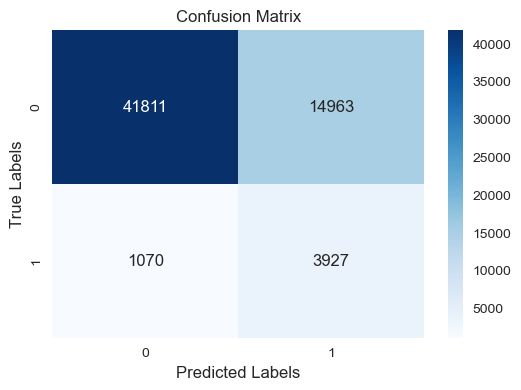

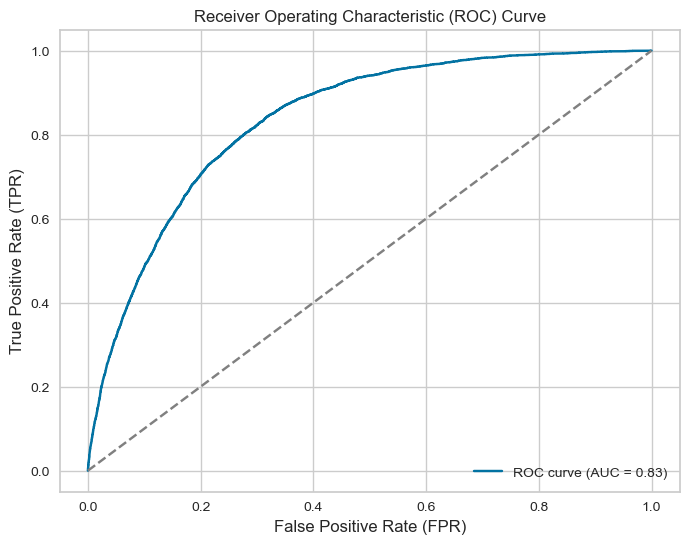

ROC-AUC scores for each fold:
[0.83565261 0.84008067 0.84220097 0.83715874 0.83096489 0.83410541
 0.83718771 0.83631537 0.82806219 0.82694394]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.83

Classification Report on Testing Data:
              precision    recall  f1-score       support
0              0.975047  0.736446  0.839115  56774.000000
1              0.207888  0.785872  0.328798   4997.000000
accuracy       0.740445  0.740445  0.740445      0.740445
macro avg      0.591467  0.761159  0.583957  61771.000000
weighted avg   0.912987  0.740445  0.797833  61771.000000


<Figure size 800x600 with 0 Axes>

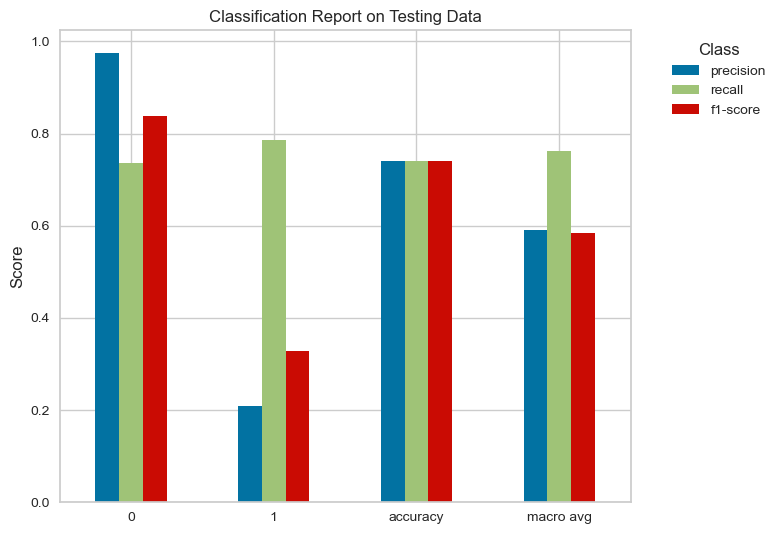

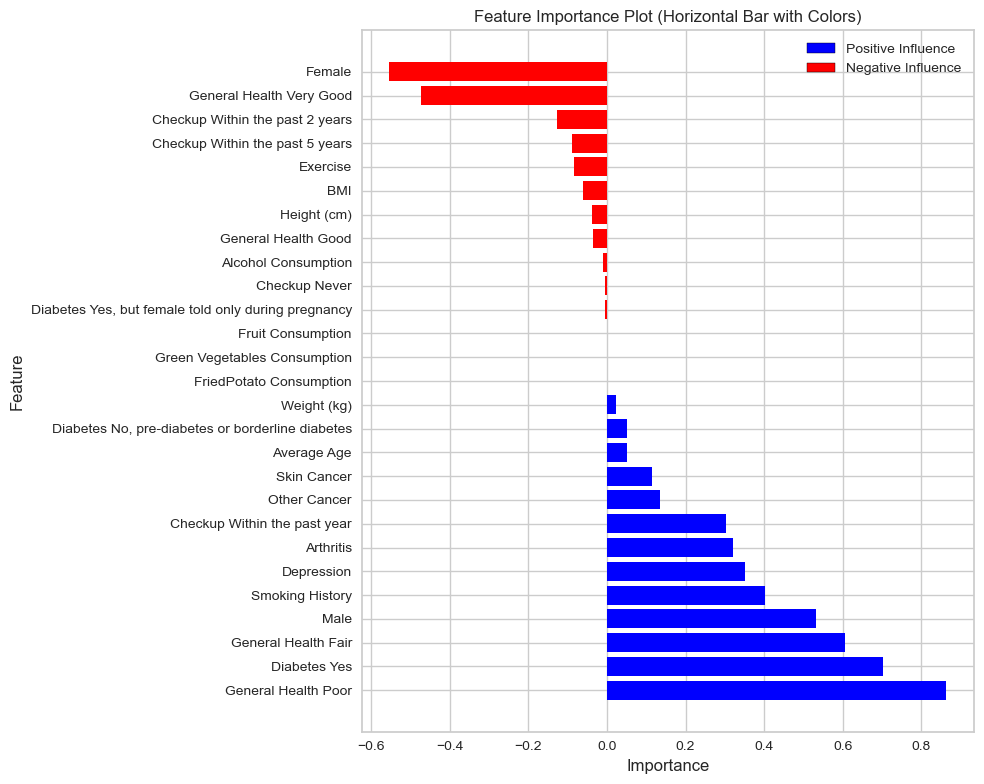

In [65]:
# Split the data into features (X) and target (y)
X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply standard scaling to the features to have no variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model and trained on the training data added class weight
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

# Predict on the test set and calculate ROC-AUC score for testing data. Model evaluated on test data
# Adjust the threshold for prediction
threshold = 0.5  # You can experiment with different threshold values
y_pred = (logreg.predict_proba(X_test_scaled)[:, 1] > threshold).astype(int)

# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(test_roc_auc))

# Print the classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred_binary))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve with the adjusted threshold
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve with the adjusted threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {average_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
# ==============================================================================
# Classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
classification_report_data = classification_report(y_test, y_pred_binary, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_data).transpose()
# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(test_roc_auc))
print("\nClassification Report on Testing Data:")
print(classification_report_df)

# Bar graph for precision, recall, and f1-score
plt.figure(figsize=(8, 6))
classification_report_df.iloc[:-1, :-1].plot(kind='bar', rot=0)
plt.title("Classification Report on Testing Data")
plt.ylabel("Score")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ====================================================================
# Create a horizontal bar chart of feature importances with different colors

# Get feature names from cardio dataset
feature_names = X.columns

# Get feature importances from the fitted logistic regression model
feature_importances = logit_model.coef_[0]

# Sort features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Remove underscores from feature names
sorted_feature_names = [name.replace('_', ' ') for name in sorted_feature_names]

# Create a list of colors for the bars
colors = ['blue' if imp > 0 else 'red' for imp in sorted_importances]

plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center', color=colors)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Horizontal Bar with Colors)')
plt.tight_layout()

# Create custom legend handles with distinct colors
legend_handles = [Patch(facecolor='blue', edgecolor='black', label='Positive Influence'),
                  Patch(facecolor='red', edgecolor='black', label='Negative Influence')]

# Add the custom legend handles
plt.legend(handles=legend_handles)

plt.show()

## With the Sex category split into Male and Female

ROC-AUC scores for each fold:
[0.83581587 0.83996067 0.84231026 0.83711867 0.83089049 0.83413677
 0.83713559 0.83602247 0.8278158  0.82695703]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.69

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73     56774
           1       0.14      0.79      0.24      4997

    accuracy                           0.61     61771
   macro avg       0.56      0.69      0.49     61771
weighted avg       0.90      0.61      0.69     61771



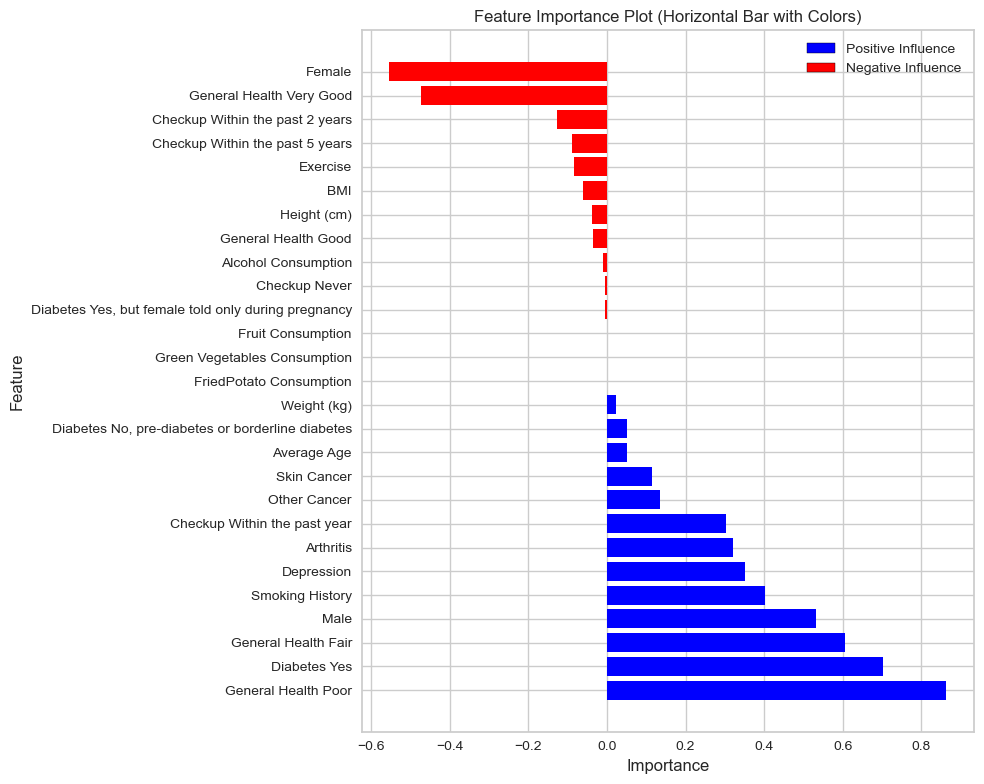

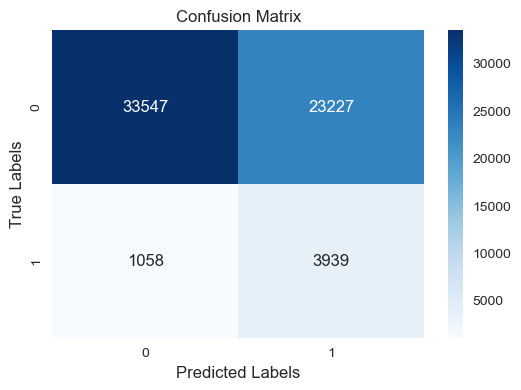

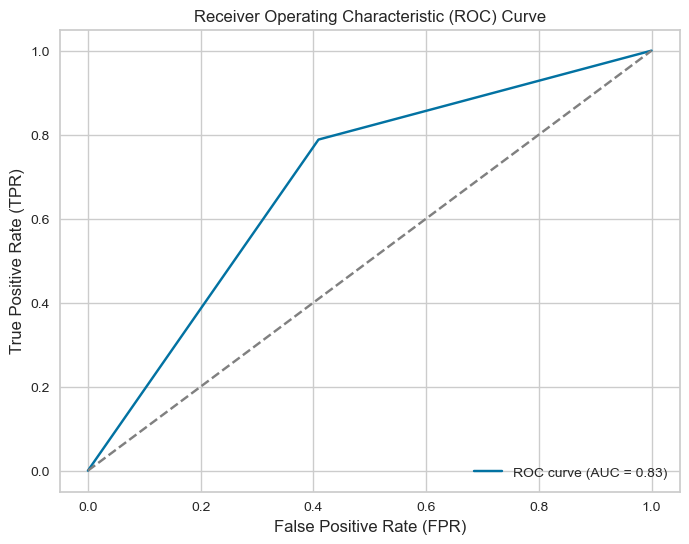

In [67]:
# Split the data into features (X) and target (y)
X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply standard scaling to the features to have no variance ##
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logit_model, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

# Predict on the test set and calculate ROC-AUC score for testing data. Model evaluated on test data
threshold = 0.5
y_pred = logit_model.predict_proba(X_test_scaled)[:, 1]  > threshold
roc_auc_test = roc_auc_score(y_test, y_pred)

# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))

# Print the classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred_binary))

#====================================================================
# Feature Importance Plot
# Get feature names from cardio dataset
feature_names = X.columns

# Get feature importances from the fitted logistic regression model
feature_importances = logit_model.coef_[0]

# Sort features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Remove underscores from feature names
sorted_feature_names = [name.replace('_', ' ') for name in sorted_feature_names]

# Create a list of colors for the bars
colors = ['blue' if imp > 0 else 'red' for imp in sorted_importances]

# Create a horizontal bar chart of feature importances with different colors
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center', color=colors)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Horizontal Bar with Colors)')
plt.tight_layout()

# Create custom legend handles with distinct colors
legend_handles = [Patch(facecolor='blue', edgecolor='black', label='Positive Influence'),
                  Patch(facecolor='red', edgecolor='black', label='Negative Influence')]

# Add the custom legend handles
plt.legend(handles=legend_handles)

plt.show()


#=====================================================================
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#==================================================================
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {average_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Average_Age: 0.9954
General_Health_Fair: 0.5566
General_Health_Good: 0.4840
General_Health_Poor: 0.4306
General_Health_Very Good: 0.2313
Male: 0.2259
Female: -0.2259
Smoking_History: 0.2122
Checkup_Within the past year: 0.2073
Diabetes_Yes: 0.2028
Arthritis: 0.1443
Depression: 0.1234
BMI: 0.1192
Weight_(kg): -0.1149
Alcohol_Consumption: -0.0691
Checkup_Within the past 2 years: 0.0510
Other_Cancer: 0.0334
Diabetes_No, pre-diabetes or borderline diabetes: 0.0270
Skin_Cancer: 0.0270
Green_Vegetables_Consumption: 0.0253
Exercise: -0.0207
Checkup_Within the past 5 years: 0.0124
Diabetes_Yes, but female told only during pregnancy: 0.0080
FriedPotato_Consumption: -0.0074
Checkup_Never: 0.0059
Height_(cm): 0.0017
Fruit_Consumption: -0.0002


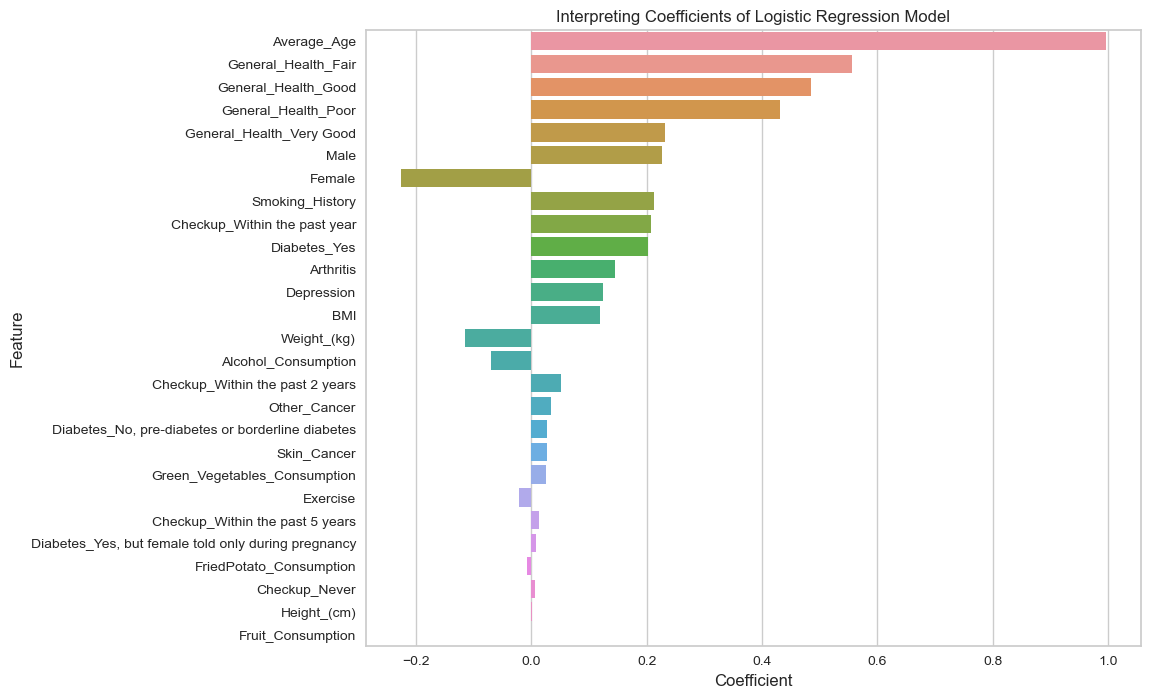

In [69]:
# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients and their interpretation
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to highlight the most important features
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

# Print the interpretation of the coefficients
for index, row in coeff_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")

# Optionally, you can plot the coefficients to visualize their magnitudes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, orient='h')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Interpreting Coefficients of Logistic Regression Model')
plt.show()